## Объявляем библиотеки

In [3]:
import sys
import sklearn
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Xiaomi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



     -------------------------------------- 455.9/455.9 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tenso

ModuleNotFoundError: No module named 'tensorflow.python'

## Скачиваем и визуализируем данные

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

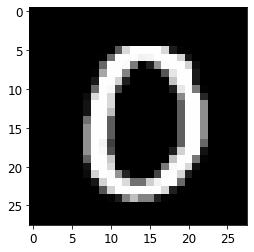

In [4]:
plt.imshow(X_train[10], cmap='gray')
plt.show()

## Обучаем полносвязную нейронную сеть

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2022-10-20 10:42:01.835823: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

2022-10-20 10:42:01.936147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0167 - accuracy: 0.7330 - val_loss: 0.2985 - val_accuracy: 0.9174
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2995 - accuracy: 0.9153 - val_loss: 0.2354 - val_accuracy: 0.9338
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2396 - accuracy: 0.9306 - val_loss: 0.2038 - val_accuracy: 0.9418
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2054 - accuracy: 0.9408 - val_loss: 0.1789 - val_accuracy: 0.9504
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1784 - accuracy: 0.9489 - val_loss: 0.1591 - val_accuracy: 0.9534


In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 709us/step - loss: 0.1636 - accuracy: 0.9513


[0.163639634847641, 0.9513000249862671]

In [9]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.95, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

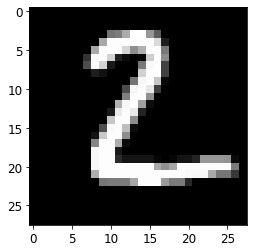

In [20]:
plt.imshow(X_test[1], cmap='gray')
plt.show()

## Обучаем сверточную нейронную сеть

In [11]:
X_train.shape

(55000, 28, 28)

In [12]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [13]:
X_train.shape

(55000, 28, 28, 1)

In [14]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/5
1719/1719 [==============================] - 207s 120ms/step - loss: 0.6667 - accuracy: 0.7781 - val_loss: 0.0571 - val_accuracy: 0.9876
Epoch 2/5
1719/1719 [==============================] - 208s 121ms/step - loss: 0.1015 - accuracy: 0.9774 - val_loss: 0.0562 - val_accuracy: 0.9878
Epoch 3/5
1719/1719 [==============================] - 204s 118ms/step - loss: 0.0783 - accuracy: 0.9827 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 4/5
1719/1719 [==============================] - 204s 119ms/step - loss: 0.0644 - accuracy: 0.9855 - val_loss: 0.0465 - val_accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 12s 40ms/step - loss: 0.0502 - accuracy: 0.9898


In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.0502 - accuracy: 0.9898


[0.05024703964591026, 0.989799976348877]

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

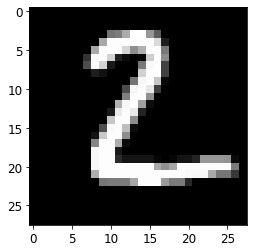

In [19]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')
plt.show()

## Домашнее задание

Подобрать гиперпараметры сверточной нейронной сети и обучить ее для датасета CIFAR10 (keras.datasets.cifar10). Сравнить точность ее работы с полносвязной нейронной сетью. Лучше сделать в google colab и подключить использование GPU.